In [1]:
from scipy.io import loadmat
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

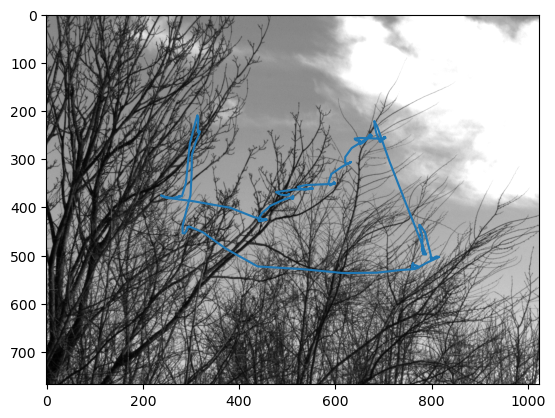

In [2]:
img_name = 'imk00031.iml'
eye_fname = Path('Doves/Fixations/' + img_name + '.mat')
img_fname = Path('Doves/Images/' + img_name)
mat = loadmat(eye_fname)
w = 1024
h = 768
with open(img_fname, 'rb') as f:
    img = f.read()
img = np.frombuffer(img, dtype='>u2').reshape((h, w)) # bigendian
img = img.astype('float32')
img /= img.max()
img = np.clip(img * 1.3 + .05, 0, 1)

subj_idx = 0

fs = 200
eye_x = mat['eye_data'][0,subj_idx][0,:]
eye_y = mat['eye_data'][0,subj_idx][1,:]
t = np.arange(len(eye_x)) / fs

plt.figure()
plt.imshow(img, cmap='gray')
plt.plot(eye_x, eye_y)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


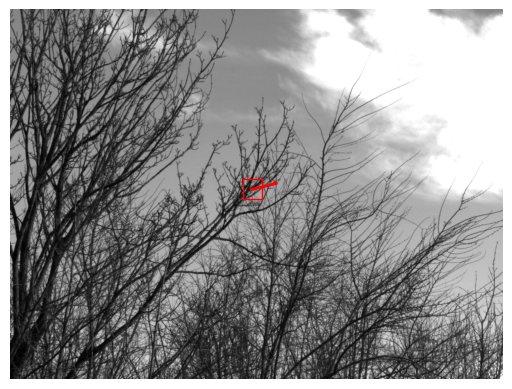

In [3]:
# make an animation showing the eye movements
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML

out_fs = 30
out_t = np.arange(0, t[-1], 1/out_fs)
out_x = np.interp(out_t, t, eye_x)
out_y = np.interp(out_t, t, eye_y)


fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
line, = ax.plot([], [], 'r', lw=2)
box, = ax.plot([], [], 'r', lw=1)
plt.axis('off')

def init():
    line.set_data([], [])
    box.set_data([], [])
    return (line, box)

tail_length = int(.5 * out_fs)
box_size = 20
def animate(i):
    line.set_data(out_x[max(i-tail_length, 0):i], out_y[max(i-tail_length, 0):i])
    x = out_x[i]
    y = out_y[i]
    box.set_data(
        [x-box_size, x+box_size, x+box_size, x-box_size, x-box_size], 
        [y-box_size, y-box_size, y+box_size, y+box_size, y-box_size]
        )
    return (line, box)

# save as mp4
anim = FuncAnimation(fig, animate, init_func=init, frames=len(out_t), interval=1000/out_fs, blit=True)
writer = FFMpegWriter(fps=out_fs)
anim.save('doves-anim.mp4', writer=writer)
anim.save('doves-anim.gif', writer='imagemagick', fps=out_fs)

MovieWriter imagemagick unavailable; using Pillow instead.


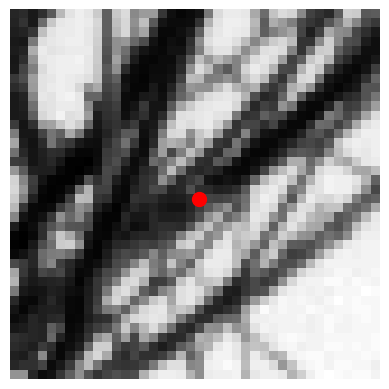

In [4]:

out_frames = []
for iF in range(len(out_t)):
    x = int(out_x[iF])
    y = int(out_y[iF])
    out_frames.append(img[y-box_size:y+box_size, x-box_size:x+box_size])
out_frames = np.array(out_frames)

fig, ax = plt.subplots()
im = ax.imshow(out_frames[0], cmap='gray')
line = ax.scatter([box_size], [box_size], 100, 'r')#, s=2)
plt.axis('off')

def init():
    im.set_data(out_frames[0])
    return (im, line)

def animate(i):
    im.set_data(out_frames[i])
    return (im, line)

# save as mp4
anim = FuncAnimation(fig, animate, init_func=init, frames=len(out_t), interval=1000/out_fs, blit=True)
writer = FFMpegWriter(fps=out_fs)
anim.save('doves-rf-anim.mp4', writer=writer)
# save as gif
anim.save('doves-rf-anim.gif', writer='imagemagick', fps=out_fs)
